# Machine learning lab #1 (kNN)

### Andosov German, M33391

##### Part 1. Dataset normalization

Dataset source: https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?select=FIFA22_official_data.csv

In [23]:
import pandas as pd

pd.options.mode.copy_on_write = True
pd.set_option('display.max_columns', 65)

DATASET_PATH = "FIFA22_official_data.csv"
df = pd.read_csv(DATASET_PATH)
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,€107.5M,€250K,2341,Right,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",NaN,2025,179cm,69kg,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,NaN,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,€93M,€140K,2314,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos11"">LDM",8.0,"Jul 1, 2018",NaN,2026,189cm,82kg,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,NaN,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,€44.5M,€135K,2307,Right,5.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",NaN,2022,182cm,83kg,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,€125.5M,€350K,2304,Right,4.0,5.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM",17.0,"Aug 30, 2015",NaN,2025,181cm,70kg,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,NaN,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,€37M,€45K,2292,Left,2.0,3.0,4.0,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB",19.0,"Sep 14, 2020",NaN,2024,172cm,69kg,87.0,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,77.0,76.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,79.0,81.0,82.0,76.0,87.0,NaN,84.0,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,€100K,€1K,782,Right,1.0,2.0,1.0,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES",31.0,"Jul 1, 2016",NaN,2019,188cm,80kg,12.0,5.0,13.0,18.0,7.0,12.0,11.0,13.0,19.0,10.0,15.0,21.0,34.0,30.0,31.0,16.0,51.0,26.0,57.0,6.0,16.0,9.0,5.0,29.0,18.0,37.0,5.0,11.0,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,€238K,NaN
16706,262846,�. Dobre,20,https://cdn.sofifa.com/pla

The task – **define each player's pitch position based on FIFA numerical characteristics**.

Let's remain necessary columns only:

In [24]:
useful_columns = [
    "Overall",
    "Value",
    "Preferred Foot",
    "International Reputation",
    "Weak Foot",
    "Skill Moves",
    "Height",
    "Weight",
    "Crossing",
    "Finishing",
    "HeadingAccuracy",
    "ShortPassing",
    "Volleys",
    "Dribbling",
    "Curve",
    "FKAccuracy",
    "LongPassing",
    "BallControl",
    "Acceleration",
    "SprintSpeed",
    "Agility",
    "Reactions",
    "Balance",
    "ShotPower",
    "Jumping",
    "Stamina",
    "Strength",
    "LongShots",
    "Aggression",
    "Interceptions",
    "Positioning",
    "Vision",
    "Penalties",
    "Composure",
    "StandingTackle",
    "SlidingTackle",
    "GKDiving",
    "GKHandling",
    "GKKicking",
    "GKPositioning",
    "GKReflexes",
    "DefensiveAwareness",
    "Best Position", # target!
]

df = df[useful_columns]

In [25]:
df

,Overall,Value,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness,Best Position
0,88,€107.5M,Right,3.0,3.0,4.0,179cm,69kg,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,73.0,65.0,12.0,14.0,15.0,8.0,14.0,72.0,CAM
1,87,€93M,Right,4.0,4.0,3.0,189cm,82kg,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,85.0,77.0,13.0,8.0,15.0,11.0,9.0,74.0,CM
2,88,€44.5M,Right,5.0,4.0,3.0,182cm,83kg,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,42.0,ST
3,91,€125.5M,Right,4.0,5.0,4.0,181cm,70kg,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,68.0,CM
4,84,€37M,Left,2.0,3.0,4.0,172cm,69kg,87.0,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,77.0,76.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,79.0,81.0,82.0,76.0,87.0,84.0,82.0,8.0,14.0,13.0,13.0,14.0,80.0,LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,53,€100K,Right,1.0,2.0,1.0,188cm,80kg,12.0,5.0,13.0,18.0,7.0,12.0,11.0,13.0,19.0,10.0,15.0,21.0,34.0,30.0,31.0,16.0,51.0,26.0,57.0,6.0,16.0,9.0,5.0,29.0,18.0,37.0,11.0,12.0,55.0,54.0,52.0,50.0,59.0,NaN,GK
16706,53,€180K,Right,1.0,2.0,1.0,194cm,86kg,13.0,7.0,10.0,17.0,7.0,6.0,11.0,13.0,28.0,17.0,16.0,22.0,30.0,38.0,24.0,40.0,35.0,24.0,32.0,6.0,18.0,13.0,8.0,33.0,12.0,29.0,13.0,12.0,57.0,52.0,53.0,48.0,58.0,5.0,GK
16707,47,€100K,Right,1.0,2.0,1.0,180cm,71kg,12.0,9.0,14.0,15.0,6.0,8.0,12.0,13.0,14.0,12.0,22.0,17.0,36.0,43.0,36.0,34.0,51.0,20.0,51.0,8.0,13.0,11.0,7.0,18.0,15.0,17.0,11.0,9.0,49.0,48.0,45.0,38.0,52.0,21.0,GK
16708,47,€110K,Right,1.0,3.0,1.0,186cm,74kg,13.0,8.0,10.0,22.0,8.0,10.0,11.0,13.0,18.0,13.0,20.0,18.0,26.0,45.0,44.0,29.0,45.0,19.0,34.0,5.0,24.0,6.0,6.0,31.0,19.0,23.0,14.0,13.0,49.0,41.0,39.0,45.0,49.0,7.0,GK


Check the gaps in our data:

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Overall                   16710 non-null  int64  
 1   Value                     16710 non-null  object 
 2   Preferred Foot            16710 non-null  object 
 3   International Reputation  16710 non-null  float64
 4   Weak Foot                 16710 non-null  float64
 5   Skill Moves               16710 non-null  float64
 6   Height                    16710 non-null  object 
 7   Weight                    16710 non-null  object 
 8   Crossing                  16710 non-null  float64
 9   Finishing                 16710 non-null  float64
 10  HeadingAccuracy           16710 non-null  float64
 11  ShortPassing              16710 non-null  float64
 12  Volleys                   16673 non-null  float64
 13  Dribbling                 16710 non-null  float64
 14  Curve 

Gaps are really rare, so let's remove all players that have at least 1 gap.

In [27]:
df = df.dropna()
df = df[df["Value"] != "€0"]

Characteristics "Value", "Preferred Foot", "Height", "Weight" are non-numerical now, they need some processing:

Value:

In [28]:
df["Value"]

0        €107.5M
1           €93M
2         €44.5M
3        €125.5M
4           €37M
          ...   
16703      €170K
16704      €375K
16706      €180K
16707      €100K
16708      €110K
Name: Value, Length: 15571, dtype: object

(array([1.3428e+04, 9.9900e+02, 3.6400e+02, 2.3500e+02, 1.4600e+02,
        1.0200e+02, 7.8000e+01, 4.5000e+01, 4.0000e+01, 3.3000e+01,
        2.1000e+01, 1.2000e+01, 3.0000e+00, 1.1000e+01, 5.0000e+00,
        8.0000e+00, 9.0000e+00, 3.0000e+00, 3.0000e+00, 6.0000e+00,
        4.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00, 4.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.50000000e+04, 4.86462500e+06, 9.71425000e+06, 1.45638750e+07,
        1.94135000e+07, 2.42631250e+07, 2.91127500e+07, 3.39623750e+07,
        3.88120000e+07, 4.36616250e+07, 4.85112500e+07, 5.33608750e+07,
        5.82105000e+07, 6.30601250e+07, 6.79097500e+07, 7.27593750e+07,
        7.76090000e+07, 8.24586250e+07, 8.73082500e+07, 9.21578750e+07,
        9.70075000e+07, 1.01857125e+08, 1.06706750e+08, 1.11556375e+08,
        1.16406000e+08

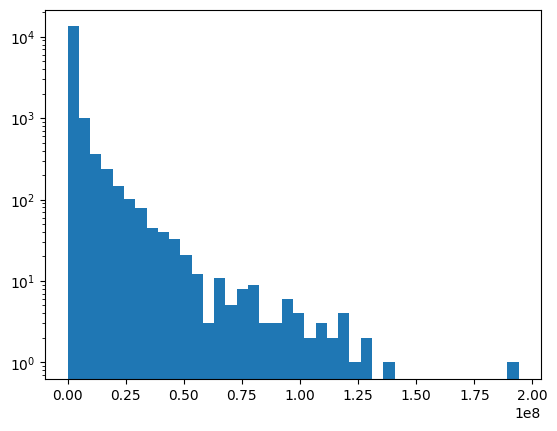

In [29]:
import matplotlib.pyplot as plt


def value_to_num(s: str):
    num = float(''.join(c for c in s if '0' <= c <= '9' or c == '.'))
    if s[-1] == 'M':
        num *= 10 ** 6
    elif s[-1] == 'K':
        num *= 10 ** 3
    else:
        raise Exception("unreachable code")
    return num


df["Value"] = df["Value"].map(lambda s: value_to_num(s))
plt.hist(df["Value"], log=True, bins=40)

Preferred Foot:

In [30]:
def pf_to_num(s: str):
    return int(s != "Right")


# print(len(df[df["Preferred Foot"] == "Left"]))
df["Preferred Foot"] = df["Preferred Foot"].map(lambda s: pf_to_num(s))
# print(len(df[df["Preferred Foot"] == 1]))
df["Preferred Foot"]

0        0
1        0
2        0
3        0
4        1
        ..
16703    0
16704    0
16706    0
16707    0
16708    0
Name: Preferred Foot, Length: 15571, dtype: int64

Height:

In [31]:
df["Height"]

0        179cm
1        189cm
2        182cm
3        181cm
4        172cm
         ...  
16703    188cm
16704    195cm
16706    194cm
16707    180cm
16708    186cm
Name: Height, Length: 15571, dtype: object

In [32]:
# len(df[df["Height"].map(lambda h: h[-2:]) == "cm"])

df["Height"] = df["Height"].map(lambda h: int(h[:-2]))
df["Height"]

0        179
1        189
2        182
3        181
4        172
        ... 
16703    188
16704    195
16706    194
16707    180
16708    186
Name: Height, Length: 15571, dtype: int64

Weight:

In [33]:
df["Weight"]

0        69kg
1        82kg
2        83kg
3        70kg
4        69kg
         ... 
16703    83kg
16704    85kg
16706    86kg
16707    71kg
16708    74kg
Name: Weight, Length: 15571, dtype: object

In [34]:
# len(df[df["Weight"].map(lambda w: w[-2:]) == "kg"])

df["Weight"] = df["Weight"].map(lambda h: int(h[:-2]))
df["Weight"]

0        69
1        82
2        83
3        70
4        69
         ..
16703    83
16704    85
16706    86
16707    71
16708    74
Name: Weight, Length: 15571, dtype: int64

Check that all feature are numerical now:

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15571 entries, 0 to 16708
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Overall                   15571 non-null  int64  
 1   Value                     15571 non-null  float64
 2   Preferred Foot            15571 non-null  int64  
 3   International Reputation  15571 non-null  float64
 4   Weak Foot                 15571 non-null  float64
 5   Skill Moves               15571 non-null  float64
 6   Height                    15571 non-null  int64  
 7   Weight                    15571 non-null  int64  
 8   Crossing                  15571 non-null  float64
 9   Finishing                 15571 non-null  float64
 10  HeadingAccuracy           15571 non-null  float64
 11  ShortPassing              15571 non-null  float64
 12  Volleys                   15571 non-null  float64
 13  Dribbling                 15571 non-null  float64
 14  Curve      

Let's take a look at our target, "Best position"

In [36]:
df["Best Position"].value_counts()

Best Position
CB     2954
ST     2366
CAM    2040
GK     1442
RM     1248
CDM    1160
CM      943
RB      818
LB      779
LM      723
RW      303
RWB     292
LWB     273
LW      164
CF       66
Name: count, dtype: int64

Let's reduce the number of classes to four: **Goalkeeper, Defence, Midfield and Attack**.

In [37]:
position_to_class = {
    # Goalkeeper
    "GK": 0,
    # Defence
    "CB": 1,
    "RB": 1,
    "LB": 1,
    "RWB": 1,
    "LWB": 1,
    # Midfield
    "CM": 2,
    "RM": 2,
    "LM": 2,
    "RW": 2,
    "LW": 2,
    "CDM": 2,
    # Attack
    "CAM": 3,
    "ST": 3,
    "CF": 3,
}

df["Best Position"] = df["Best Position"].map(position_to_class)
df["Best Position"].value_counts()

Best Position
1    5116
2    4541
3    4472
0    1442
Name: count, dtype: int64

It's time for normalization: let's make all features normally distributed. Since all our features are non-negative, let's apply **Box-Cox transformation** for all of them. For example, this is how it works for "Value":

(array([1.3428e+04, 9.9900e+02, 3.6400e+02, 2.3500e+02, 1.4600e+02,
        1.0200e+02, 7.8000e+01, 4.5000e+01, 4.0000e+01, 3.3000e+01,
        2.1000e+01, 1.2000e+01, 3.0000e+00, 1.1000e+01, 5.0000e+00,
        8.0000e+00, 9.0000e+00, 3.0000e+00, 3.0000e+00, 6.0000e+00,
        4.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00, 4.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.50000000e+04, 4.86462500e+06, 9.71425000e+06, 1.45638750e+07,
        1.94135000e+07, 2.42631250e+07, 2.91127500e+07, 3.39623750e+07,
        3.88120000e+07, 4.36616250e+07, 4.85112500e+07, 5.33608750e+07,
        5.82105000e+07, 6.30601250e+07, 6.79097500e+07, 7.27593750e+07,
        7.76090000e+07, 8.24586250e+07, 8.73082500e+07, 9.21578750e+07,
        9.70075000e+07, 1.01857125e+08, 1.06706750e+08, 1.11556375e+08,
        1.16406000e+08

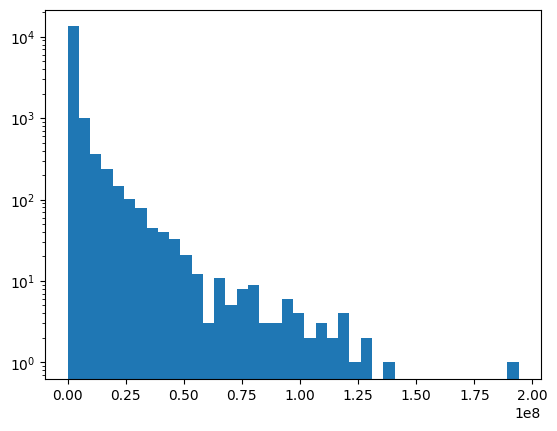

In [38]:
plt.hist(df["Value"], log=True, bins=40)

(array([5.000e+00, 0.000e+00, 1.000e+00, 6.000e+00, 1.000e+00, 3.000e+00,
        2.000e+00, 7.000e+00, 1.000e+01, 1.400e+01, 2.700e+01, 1.300e+01,
        6.800e+01, 7.900e+01, 1.010e+02, 1.130e+02, 2.770e+02, 2.370e+02,
        5.710e+02, 5.210e+02, 8.730e+02, 1.071e+03, 1.287e+03, 1.153e+03,
        1.583e+03, 1.596e+03, 1.366e+03, 1.144e+03, 8.740e+02, 5.550e+02,
        4.330e+02, 4.360e+02, 2.820e+02, 2.890e+02, 2.170e+02, 1.770e+02,
        1.020e+02, 4.300e+01, 2.900e+01, 5.000e+00]),
 array([5.54075005, 5.58106412, 5.62137819, 5.66169225, 5.70200632,
        5.74232038, 5.78263445, 5.82294851, 5.86326258, 5.90357664,
        5.94389071, 5.98420478, 6.02451884, 6.06483291, 6.10514697,
        6.14546104, 6.1857751 , 6.22608917, 6.26640323, 6.3067173 ,
        6.34703137, 6.38734543, 6.4276595 , 6.46797356, 6.50828763,
        6.54860169, 6.58891576, 6.62922982, 6.66954389, 6.70985796,
        6.75017202, 6.79048609, 6.83080015, 6.87111422, 6.91142828,
        6.95174235, 6.9920

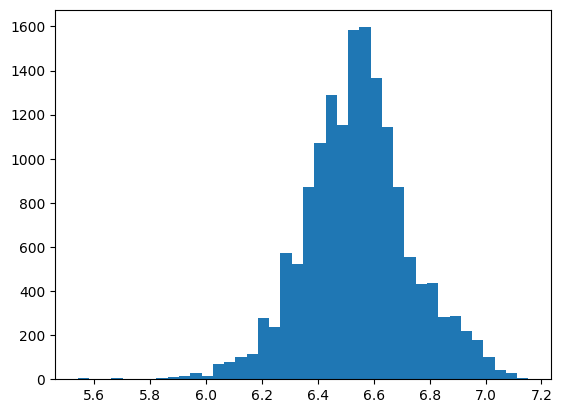

In [39]:
from scipy import stats

df["Value"], fitted_lambda = stats.boxcox(df["Value"])
plt.hist(df["Value"], bins=40)

Great, let's apply it to all our features:

In [40]:
df

,Overall,Value,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness,Best Position
0,88,7.099536,0,3.0,3.0,4.0,179,69,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,73.0,65.0,12.0,14.0,15.0,8.0,14.0,72.0,3
1,87,7.085708,0,4.0,4.0,3.0,189,82,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,85.0,77.0,13.0,8.0,15.0,11.0,9.0,74.0,2
2,88,7.011261,0,5.0,4.0,3.0,182,83,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,42.0,3
3,91,7.114032,0,4.0,5.0,4.0,181,70,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,68.0,2
4,84,6.991498,1,2.0,3.0,4.0,172,69,87.0,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,77.0,76.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,79.0,81.0,82.0,76.0,87.0,84.0,82.0,8.0,14.0,13.0,13.0,14.0,80.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,52,6.153250,0,1.0,3.0,1.0,188,83,13.0,9.0,13.0,22.0,5.0,12.0,12.0,10.0,19.0,15.0,19.0,15.0,21.0,47.0,38.0,35.0,50.0,18.0,61.0,5.0,27.0,14.0,8.0,23.0,10.0,33.0,12.0,10.0,53.0,45.0,47.0,52.0,57.0,6.0,0
16704,58,6.315229,0,1.0,2.0,1.0,195,85,8.0,9.0,11.0,23.0,7.0,11.0,11.0,11.0,17.0,14.0,24.0,25.0,27.0,42.0,20.0,42.0,22.0,21.0,67.0,8.0,21.0,4.0,5.0,27.0,7.0,29.0,12.0,10.0,59.0,60.0,56.0,55.0,61.0,5.0,0
16706,53,6.165509,0,1.0,2.0,1.0,194,86,13.0,7.0,10.0,17.0,7.0,6.0,11.0,13.0,28.0,17.0,16.0,22.0,30.0,38.0,24.0,40.0,35.0,24.0,32.0,6.0,18.0,13.0,8.0,33.0,12.0,29.0,13.0,12.0,57.0,52.0,53.0,48.0,58.0,5.0,0
16707,47,6.035081,0,1.0,2.0,1.0,180,71,12.0,9.0,14.0,15.0,6.0,8.0,12.0,13.0,14.0,12.0,22.0,17.0,36.0,43.0,36.0,34.0,51.0,20.0,51.0,8.0,13.0,11.0,7.0,18.0,15.0,17.0,11.0,9.0,49.0,48.0,45.0,38.0,52.0,21.0,0


In [41]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = useful_columns.copy()
columns_to_normalize.remove("Preferred Foot")
columns_to_normalize.remove("Best Position")

scaler = MinMaxScaler()

for col in columns_to_normalize:
    df[col] = df[col].map(lambda x: x + 0.1) # Avoiding zeros
    df[col], fitted_lambda = stats.boxcox(df[col])
    df[col] = scaler.fit_transform(df[[col]])

Let's take a final look:

In [42]:
df

,Overall,Value,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness,Best Position
0,0.896111,0.965300,0,0.999996,0.547103,0.769853,0.457923,0.409362,0.879275,0.840352,0.515232,0.918718,0.961344,0.727446,0.901025,0.929051,0.901692,0.774070,0.599796,0.527474,0.679205,0.947359,0.671440,0.891907,0.597983,0.869276,0.532252,0.925449,0.721795,0.698950,0.849059,0.914339,0.969827,0.827760,0.743653,0.679448,0.876573,0.888964,0.896493,0.816781,0.893601,0.741215,3
1,0.875220,0.956391,0,1.000000,0.781001,0.529873,0.655502,0.623446,0.686483,0.827317,0.870583,0.792544,0.733171,0.746755,0.750452,0.805946,0.826370,0.774070,0.617249,0.704963,0.608442,0.895279,0.537595,0.822224,0.699604,0.807544,0.830810,0.881511,0.768519,0.939282,0.816853,0.815324,0.535678,0.738529,0.896343,0.821466,0.885996,0.811673,0.896493,0.863934,0.836564,0.765440,2
2,0.896111,0.908532,0,1.000000,0.781001,0.529873,0.516792,0.638677,0.764595,0.972991,0.835028,0.722278,1.000000,0.727446,0.887080,0.877996,0.701733,0.751131,0.582608,0.464058,0.591339,0.964844,0.653979,0.891907,0.533665,0.619045,0.777327,0.910736,0.865054,0.405726,0.914938,0.815324,0.851603,0.827760,0.403167,0.363337,0.949556,0.941042,0.955119,0.960673,0.967473,0.391017,3
3,0.958556,0.974645,0,1.000000,1.000000,0.769853,0.497130,0.427009,1.000000,0.827317,0.393272,1.000000,0.897297,0.826735,0.873186,0.888233,1.000000,0.870106,0.582608,0.577861,0.661161,0.947359,0.653979,0.927467,0.442423,0.827854,0.593920,0.955074,0.691229,0.698950,0.865346,0.982642,0.851603,0.864748,0.643921,0.538286,0.901446,0.880502,0.716840,0.851008,0.885339,0.693056,2
4,0.812309,0.895855,1,0.999577,0.547103,0.769853,0.321941,0.409362,0.879275,0.624889,0.432363,0.699743,0.720700,0.806327,0.915019,0.805946,0.718976,0.797434,0.599796,0.577861,0.734749,0.809760,0.877216,0.771236,0.442423,0.848431,0.691470,0.809641,0.816277,0.854682,0.753927,0.783253,0.751532,0.827760,0.883486,0.880862,0.818746,0.888964,0.880604,0.884423,0.893601,0.838672,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,0.114594,0.369638,0,0.000000,0.547103,0.000000,0.635572,0.638677,0.025401,0.038233,0.025753,0.021109,0.008827,0.009181,0.041564,0.080422,0.040506,0.006538,0.016397,0.000000,0.012629,0.248080,0.128461,0.130462,0.266907,0.013421,0.403525,0.004495,0.106310,0.103664,0.013233,0.077378,0.018869,0.116933,0.046133,0.044085,0.983304,0.974887,0.976658,0.982013,0.986098,0.024363,0
16704,0.249775,0.469538,0,0.000000,0.291731,0.000000,0.775873,0.668671,0.003542,0.038233,0.017708,0.023898,0.027124,0.007323,0.034069,0.093208,0.030468,0.005208,0.035709,0.034859,0.043935,0.178911,0.004750,0.205162,0.000000,0.023921,0.487789,0.020053,0.060256,0.000000,0.004335,0.108219,0.000000,0.087327,0.046133,0.044085,0.987205,0.986664,0.983862,0.984158,0.988490,0.015992,0
16706,0.137293,0.377168,0,0.000000,0.291731,0.000000,0.755717,0.683442,0.025401,0.024359,0.014070,0.009994,0.027124,0.000784,0.034069,0.118419,0.097033,0.009650,0.007299,0.022208,0.062632,0.125457,0.026009,0.182991,0.104025,0.036317,0.088042,0.009359,0.039872,0.092973,0.013233,0.159908,0.032700,0.087327,0.055762,0.066362,0.985986,0.981130,0.981701,0.978785,0.986723,0.015992,0
16707,0.000000,0.297314,0,0.000000,0.291731,0.000000,0.477507,0.444440,0.020509,0.038233,0.030151,0.006763,0.017880,0.002863,0.041564,0.118419,0.017195,0.002969,0.027351,0.005328,0.106156,0.192542,0.111185,0.120467,0.279304,0.020213,0.277189,0.020053,0.010215,0.071762,0.009973,0.043224,0.055056,0.019024,0.036624,0.032999,0.980233,0.977

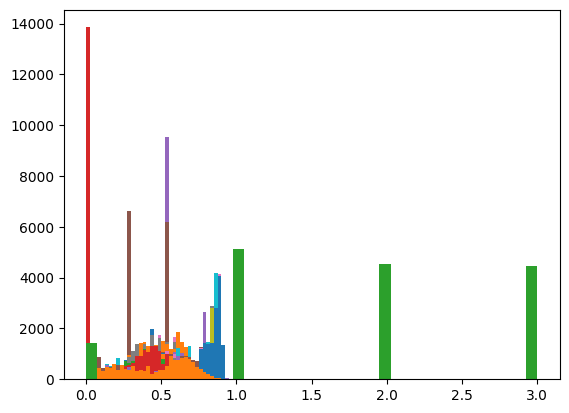

In [43]:
for col in useful_columns:
    plt.hist(df[col], bins=40)

Save the normalized dataset:

In [44]:
df.to_csv("fifa_normalized.csv", index=False)